In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib notebook

In [6]:
# Preprocess for Data Sets
# Calculate the Win ratio in NHL north division

# Data base for Vancouver canucks: https://www.hockeydb.com/stte/vancouver-canucks-8756.html
Canucks = pd.read_html('Vancouver Canucks hockey team [NHL] statistics and history at hockeydb.com.html')[0]
Canucks['Canucks']=Canucks['W']/(Canucks['W']+Canucks['L'])
Canucks=Canucks[['Season','Canucks']]

# Data sets for Toronto Maple Leafs: https://www.hockeydb.com/stte/toronto-maple-leafs-8490.html
MapleLeafs = pd.read_html('Toronto Maple Leafs hockey team statistics and history at hockeydb.com.html')[0]
MapleLeafs['MapleLeafs'] = MapleLeafs['W']/(MapleLeafs['W']+MapleLeafs['L'])
MapleLeafs=MapleLeafs[['Season','MapleLeafs']]

# Data sets for Montreal Canadiens: https://www.hockeydb.com/stte/montreal-canadiens-6929.html
Canadiens = pd.read_html('Montreal Canadiens hockey team [NHL] statistics and history at hockeydb.com.html')[0]
Canadiens['Canadiens']=Canadiens['W']/(Canadiens['W']+Canadiens['L'])
Canadiens=Canadiens[['Season','Canadiens']]

# Data Sets for Winnipeg Jets: 1 https://www.hockeydb.com/stte/winnipeg-jets-9024.html
# Data Sets for Winnipeg Jets: 2 https://www.hockeydb.com/stte/winnipeg-jets-10675.html

Jets1 = pd.read_html('Winnipeg Jets hockey team [1979-1996 NHL] statistics and history at hockeydb.com.html')[0]
Jets1['Jets']=Jets1['W']/(Jets1['W']+Jets1['L'])
Jets1=Jets1[['Season','Jets']]
Jets2 = pd.read_html('Winnipeg Jets hockey team [2011-2021 NHL] statistics and history at hockeydb.com.html')[0]
Jets2['Jets']=Jets2['W']/(Jets2['W']+Jets2['L'])
Jets2=Jets2[['Season','Jets']]
Jets = Jets1.append(Jets2).reset_index(drop=True)
Jets

# Data sets for Edmonton Oilers: https://www.hockeydb.com/stte/edmonton-oilers-5632.html
Oilers = pd.read_html('Edmonton Oilers hockey team [NHL] statistics and history at hockeydb.com.html')[0]
Oilers['Oilers']=Oilers['W']/(Oilers['W']+Oilers['L'])
Oilers=Oilers[['Season','Oilers']]

# Data sets for Calgary Flames:  https://www.hockeydb.com/stte/calgary-flames-5090.html
Flames = pd.read_html('Calgary Flames hockey team statistics and history at hockeydb.com.html')[0]
Flames['Flames']=Flames['W']/(Flames['W']+Flames['L'])
Flames=Flames[['Season','Flames']]

# Data sets for Ottawa Senetors: https://www.hockeydb.com/stte/ottawa-senators-7328.html
Senetors = pd.read_html('Ottawa Senators hockey team [1992-2021 NHL] statistics and history at hockeydb.com.html')[0]
Senetors['Senetors']=Senetors['W']/(Senetors['W']+Senetors['L'])
Senetors=Senetors[['Season','Senetors']]

<IPython.core.display.Javascript object>


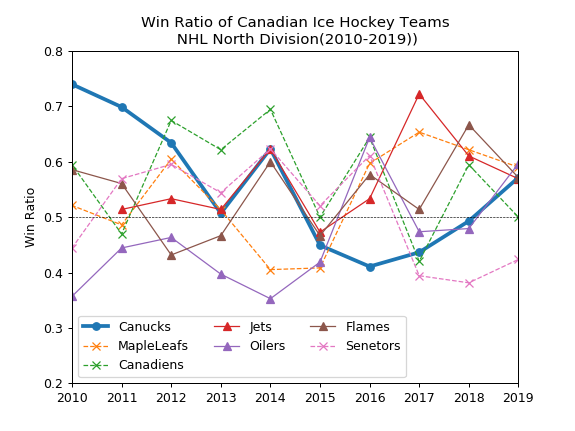

In [9]:
WinRatio=pd.merge(Canucks,MapleLeafs, how='outer', on='Season').sort_values(by='Season')
WinRatio=pd.merge(WinRatio, Canadiens, how='outer',on='Season').sort_values(by='Season')
WinRatio=pd.merge(WinRatio, Jets, how='outer',on='Season').sort_values(by='Season')
WinRatio=pd.merge(WinRatio, Oilers, how='outer',on='Season').sort_values(by='Season')
WinRatio=pd.merge(WinRatio, Flames, how='outer',on='Season').sort_values(by='Season')
WinRatio=pd.merge(WinRatio, Senetors, how='outer',on='Season').sort_values(by='Season')
WinRatio['Season']=WinRatio['Season'].apply(lambda x: re.sub(r'-[0-9][0-9]','',x)).astype('int')

fig, ax=plt.subplots()
western_canada = ['Canucks', 'Jets', 'Oilers', 'Flames']
for team in WinRatio.columns[1:]:
    if team in western_canada:
        if team == 'Canucks':
            ax.plot(WinRatio['Season'],WinRatio[team],'o-',linewidth=3,label=team)
        else:
            ax.plot(WinRatio['Season'],WinRatio[team],'^-',linewidth=1,label=team)
    else:
        ax.plot(WinRatio['Season'],WinRatio[team],'x--',linewidth=1,label=team)
ax.axhline(y=0.5,color='k',linewidth = 0.5,linestyle='--')
plt.ylim([0.2,0.8])
plt.xlim([2010, 2019])
plt.ylabel('Win Ratio')
plt.title('Win Ratio of Canadian Ice Hockey Teams\n NHL North Division(2010-2019))')
plt.legend(ncol=3)
plt.savefig('WinRatio_NHL_northdiv.png')

In [ ]:
plt.clf()
plt.figure()
western_canada = ['Canucks', 'Jets', 'Oilers', 'Flames']
for teams in western_canada:
    plt.plot(WinRatio['Season'],WinRatio[teams],'^-',label=teams)
plt.xlim([2010, 2019])
plt.ylim([0,1])
plt.legend()
plt.show()
